In [2]:
import scipy.optimize as opt
from scipy.special import erf
import numpy as np
import matplotlib.pyplot as plt # plot figures

In [3]:
bin_right_edges = [25, 30, 35, 40, 45]
age_hist_all = [0.8, 43.5, 30.5, 11.7, 5.7]
age_hist_phys = [1.4, 60.1, 26.7, 6.8, 2.4]
age_cumul_all = np.cumsum(age_hist_all)/100
age_cumul_phys = np.cumsum(age_hist_phys)/100
print(age_cumul_all, age_cumul_phys)
grid = np.linspace(20,50,100)


[ 0.008  0.443  0.748  0.865  0.922] [ 0.014  0.615  0.882  0.95   0.974]


In [4]:
# Normal distribution
def normal_fit(x, n_sigma, n_mu):
    return 0.5*(1+erf((x-n_mu)/(np.sqrt(2)*n_sigma)))

sigma0 = 5
mu0 = 30

(sigma,mu), _ = opt.curve_fit(normal_fit, bin_right_edges, age_cumul_all, [sigma0, mu0], maxfev=100000)
print(sigma,mu)

age_cumul_all_normal_fit = normal_fit(grid,sigma,mu)

5.30945990971 31.6357191696


In [5]:
# Log-normal distribution
def lognormal_fit(x, ln_sigma, ln_mu):
    return 0.5*(1+erf((np.log(x)-ln_mu)/(np.sqrt(2)*ln_sigma)))

sigma0 = 5
mu0 = np.log(30)

(sigma,mu), _ = opt.curve_fit(lognormal_fit, bin_right_edges, age_cumul_all, [sigma0, mu0], maxfev=100000)
print(sigma,mu)

age_cumul_all_lognormal_fit = lognormal_fit(grid,sigma,mu)

0.173377779608 3.44839329125


In [6]:
#Exponentially modified Gaussian distribution
def expnormal_fit(x, en_sigma, en_mu, en_lambda):
    u = en_lambda*(x-en_mu)
    v = en_lambda*en_sigma
    return normal_fit(u,0,v)-np.exp(-u+v*v/2+np.log(normal_fit(u,v*v,v)))

sigma0 = 1
mu0 = 20
lambda0 = 0.1

(sigma,mu,skew_param), _ = opt.curve_fit(expnormal_fit, bin_right_edges, age_cumul_all, [sigma0, mu0, lambda0], maxfev=100000)
print(sigma,mu,skew_param)


age_cumul_all_expnormal_fit = expnormal_fit(grid,sigma,mu,skew_param)

C:\Users\zpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


0.00870758574602 24.9912683645 0.128695598433


C:\Users\zpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


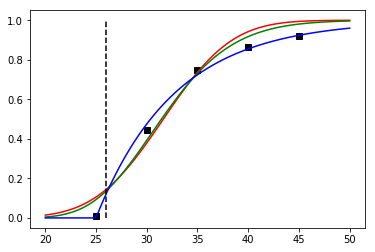

In [7]:
# determine the best fitting distribution functions for all PhDs
fig1, ax1 = plt.subplots()
ax1.plot(bin_right_edges, age_cumul_all , 'ks')
ax1.plot(grid, age_cumul_all_normal_fit,'-r')
ax1.plot(grid, age_cumul_all_lognormal_fit,'-g')
ax1.plot(grid, age_cumul_all_expnormal_fit,'-b')

ax1.plot([26, 26], [0, 1] , 'k--')


#plt.ylim(0,0.2)
#plt.xlim(20,30)
#plt.title("Top-cited publications in the field of Materials Science")
#plt.xlabel("Year")
#plt.ylabel("Number of citations")
#plt.savefig("noc_year.tiff",dpi=600)
plt.show()

In [8]:
# fit the cumulative distribution for PhDs in physics
sigma0 = 1
mu0 = 20
lambda0 = 0.1

(sigma,mu,skew_param), _ = opt.curve_fit(expnormal_fit, bin_right_edges, age_cumul_phys, [sigma0, mu0, lambda0], maxfev=100000)
print(sigma,mu,skew_param)

age_cumul_phys_expnormal_fit = expnormal_fit(grid,sigma,mu,skew_param)

0.0682153597488 25.6534730289 0.220669808452


C:\Users\zpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
C:\Users\zpan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


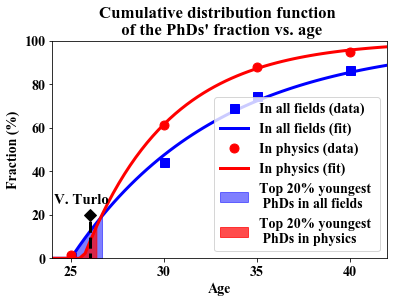

In [16]:
# plot the figure
fig1, ax1 = plt.subplots()

ax1.plot(bin_right_edges, age_cumul_all , 'bs',label='In all fields (data)', markersize=9)
ax1.plot(grid, age_cumul_all_expnormal_fit,'-b',label='In all fields (fit)', linewidth=3)
ax1.plot(bin_right_edges, age_cumul_phys , 'ro',label='In physics (data)', markersize=9)
ax1.plot(grid, age_cumul_phys_expnormal_fit,'-r',label='In physics (fit)', linewidth=3)

grid_all_top20 = [g for i,g in enumerate(grid) if age_cumul_all_expnormal_fit[i] <= 0.2]
age_all_top20 = [a for a in age_cumul_all_expnormal_fit if a <= 0.2]
grid_phys_top20 = [g for i,g in enumerate(grid) if age_cumul_phys_expnormal_fit[i] <= 0.2]
age_phys_top20 = [a for a in age_cumul_phys_expnormal_fit if a <= 0.2]

ax1.fill_between(grid_all_top20, 0,age_all_top20,color='blue',alpha=0.5, label='Top 20% youngest \n PhDs in all fields')
ax1.fill_between(grid_phys_top20, 0,age_phys_top20,color='red',alpha=0.7, label='Top 20% youngest \n PhDs in physics')

ax1.plot([26, 26], [-0.1, 0.2] , 'kD--', markersize=8, linewidth=3)
ax1.text(24.1,0.25,'V. Turlo', fontsize=15)

plt.ylim(0,1.0)
plt.xlim(24,42)
plt.title("Cumulative distribution function \n of the PhDs' fraction vs. age")
plt.xlabel("Age")
plt.ylabel("Fraction (%)")

plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],['0','20','40','60','80','100'])

plt.legend()

font = {'family' : 'serif',
        'serif'  : ['Times New Roman'],
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)
plt.rcParams['mathtext.default'] = 'regular'

plt.savefig("phd_age.tiff",dpi=600)
plt.show()